In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from datetime import datetime
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split


### Import data set

In [346]:
dt=pd.read_csv(r'C:\Users\User\Desktop\R Data+Python\Spitogatos\assignment_rev2.csv')
### or dt=pd.read_csv(r'assignment_rev2.csv') 

In [347]:
dt.head()

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,no_of_bathrooms,energy_class,renovation_year,no_of_wc,ad_type,living_rooms,kitchens,balcony_area,lux_home,new_development,garage,furnished,preserved,investment,unfinished,equipped,heating_under_floor,renovated,requires_renovation,airy,bright,painted,garden,ac,storage,balcony,internal_stairs,view,secure_door,penthouse,alarm,corner,accessible_for_disabled,holiday_home,student_home,night_power,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,0,NaN,NaN,0,simple,0,0,0,NaN,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43018583,134.7,15502.0,northern sub,642,550000,1992,ground-floor,detached,5,4,NaN,NaN,1,simple,1,1,0,False,False,True,False,False,False,False,NaN,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,True,NaN,False,False,False,False,True,False,True,True,False,False,True,False,True
2,39670968,71.0,9807.0,northern sub,320,500000,2009,ground-floor,detached,2,2,NaN,NaN,1,simple,0,0,0,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,1,NaN,NaN,1,simple,0,1,0,False,False,True,False,False,False,False,NaN,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,NaN,False,False,False,False,True,False,True,True,False,False,False,False,False
4,39742998,126.7,14682.0,northern sub,195,370000,2007,ground-floor,maisonette,4,1,NaN,NaN,2,simple,0,1,0,False,False,True,False,False,False,False,NaN,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,NaN,False,False,False,False,True,False,True,True,False,False,False,False,True


In [349]:
dt.shape

(15447, 56)

In [350]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15447 entries, 0 to 15446
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       15447 non-null  int64  
 1   ranking_score            15447 non-null  float64
 2   agent_id                 15343 non-null  float64
 3   geography_name           15447 non-null  object 
 4   sq_meters                15447 non-null  int64  
 5   price                    15447 non-null  int64  
 6   year_of_construction     15447 non-null  int64  
 7   floor                    14715 non-null  object 
 8   subtype                  15447 non-null  object 
 9   rooms                    15447 non-null  int64  
 10  no_of_bathrooms          15447 non-null  int64  
 11  energy_class             2107 non-null   object 
 12  renovation_year          2067 non-null   float64
 13  no_of_wc                 15447 non-null  int64  
 14  ad_type               

In [351]:
dt.describe()

,id,ranking_score,agent_id,sq_meters,price,year_of_construction,rooms,no_of_bathrooms,renovation_year,no_of_wc,living_rooms,kitchens,balcony_area,equipped
count,1.544700e+04,15447.000000,15343.000000,15447.000000,1.544700e+04,15447.000000,15447.000000,15447.000000,2067.000000,15447.000000,15447.000000,15447.000000,15447.000000,0.0
mean,4.131725e+07,117.620930,11530.444633,207.793487,5.930395e+05,1950.277918,2.946009,1.700913,2011.748911,0.654561,0.559397,0.611251,5.058976,NaN
std,2.101149e+06,31.482549,3156.084925,1141.088955,7.123263e+05,307.364360,2.668520,1.324825,8.017487,0.804571,1.028194,0.712105,22.618473,NaN
min,3.464630e+07,16.000000,5976.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.046387e+07,95.500000,9237.000000,89.000000,2.350000e+05,1976.000000,2.000000,1.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,4.212294e+07,122.200000,11210.000000,140.000000,4.000000e+05,1996.000000,3.000000,1.000000,2014.000000,1.000000,0.000000,1.000000,0.000000,NaN
75%,4.283962e+07,142.800000,13354.500000,250.000000,7.000000e+05,2010.000000,4.000000,2.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,NaN
max,4.346410e+07,182.800000,20017.000000,140000.000000,2.500000e+07,2155.000000,255.000000,21.000000,2019.000000,22.000000,60.000000,11.000000,400.000000,NaN


In [11]:
# To see exactly how many null per column
dt.isnull().sum()

id                             0
ranking_score                  0
agent_id                     104
geography_name                 0
sq_meters                      0
price                          0
year_of_construction           0
floor                        732
subtype                        0
rooms                          0
no_of_bathrooms                0
energy_class               13340
renovation_year            13380
no_of_wc                       0
ad_type                        0
living_rooms                   0
kitchens                       0
balcony_area                   0
lux_home                    4238
new_development             3606
garage                      1630
furnished                   4169
preserved                   5433
investment                  4964
unfinished                  5420
equipped                   15447
heating_under_floor         4677
renovated                   4329
requires_renovation         4882
airy                        3518
bright    

In [ ]:
# Lets throw away the equipped column anyway which is empty

In [353]:
dtA=dt.drop(['equipped'], axis=1).copy()

In [354]:
dtA.head()

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,no_of_bathrooms,energy_class,renovation_year,no_of_wc,ad_type,living_rooms,kitchens,balcony_area,lux_home,new_development,garage,furnished,preserved,investment,unfinished,heating_under_floor,renovated,requires_renovation,airy,bright,painted,garden,ac,storage,balcony,internal_stairs,view,secure_door,penthouse,alarm,corner,accessible_for_disabled,holiday_home,student_home,night_power,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,0,NaN,NaN,0,simple,0,0,0,NaN,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43018583,134.7,15502.0,northern sub,642,550000,1992,ground-floor,detached,5,4,NaN,NaN,1,simple,1,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,True,NaN,False,False,False,False,True,False,True,True,False,False,True,False,True
2,39670968,71.0,9807.0,northern sub,320,500000,2009,ground-floor,detached,2,2,NaN,NaN,1,simple,0,0,0,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,1,NaN,NaN,1,simple,0,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,NaN,False,False,False,False,True,False,True,True,False,False,False,False,False
4,39742998,126.7,14682.0,northern sub,195,370000,2007,ground-floor,maisonette,4,1,NaN,NaN,2,simple,0,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,NaN,False,False,False,False,True,False,True,True,False,False,False,False,True


In [355]:
dtA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15447 entries, 0 to 15446
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       15447 non-null  int64  
 1   ranking_score            15447 non-null  float64
 2   agent_id                 15343 non-null  float64
 3   geography_name           15447 non-null  object 
 4   sq_meters                15447 non-null  int64  
 5   price                    15447 non-null  int64  
 6   year_of_construction     15447 non-null  int64  
 7   floor                    14715 non-null  object 
 8   subtype                  15447 non-null  object 
 9   rooms                    15447 non-null  int64  
 10  no_of_bathrooms          15447 non-null  int64  
 11  energy_class             2107 non-null   object 
 12  renovation_year          2067 non-null   float64
 13  no_of_wc                 15447 non-null  int64  
 14  ad_type               

## Assignment Part 1

In [17]:
### Let us take a quick look at geographical namses and subtypes categories

In [15]:
dtA.geography_name.unique()

array(['northern sub', 'south beach', 'gentrification area',
       'beesy neighborhood'], dtype=object)

In [16]:
dtA.subtype.unique()

array(['apartment', 'detached', 'maisonette', 'building', 'villa',
       'other residential', 'studio', 'apartment complex', 'loft',
       'bungalow', 'houseboat'], dtype=object)

In [18]:
### Create a new column of price per sq_meters

In [19]:
dtA['price_per_sqm']=dtA['price']/dtA['sq_meters']

In [20]:
dtA.head()

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,no_of_bathrooms,energy_class,renovation_year,no_of_wc,ad_type,living_rooms,kitchens,balcony_area,lux_home,new_development,garage,furnished,preserved,investment,unfinished,heating_under_floor,renovated,requires_renovation,airy,bright,painted,garden,ac,storage,balcony,internal_stairs,view,secure_door,penthouse,alarm,corner,accessible_for_disabled,holiday_home,student_home,night_power,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom,price_per_sqm
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,0,NaN,NaN,0,simple,0,0,0,NaN,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352.733686
1,43018583,134.7,15502.0,northern sub,642,550000,1992,ground-floor,detached,5,4,NaN,NaN,1,simple,1,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,True,NaN,False,False,False,False,True,False,True,True,False,False,True,False,True,856.697819
2,39670968,71.0,9807.0,northern sub,320,500000,2009,ground-floor,detached,2,2,NaN,NaN,1,simple,0,0,0,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,1562.500000
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,1,NaN,NaN,1,simple,0,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,NaN,False,False,False,False,True,False,True,True,False,False,False,False,False,2421.052632
4,39742998,126.7,14682.0,northern sub,195,370000,2007,ground-floor,maisonette,4,1,NaN,NaN,2,simple,0,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,NaN,False,False,False,False,True,False,True,True,False,False,False,False,True,1897.435897


In [25]:
###Let us take a closer look at price_per_sqm
dtA['price_per_sqm'].describe()

count     15447.000000
mean       2979.846219
std        5570.499599
min           0.000000
25%        1911.764706
50%        2649.006623
75%        3587.200234
max      620000.000000
Name: price_per_sqm, dtype: float64

In [21]:
###It seems there is an extreme value at 620000 per sqm.Let us see distribution if price_per_sqm in TOTAL data

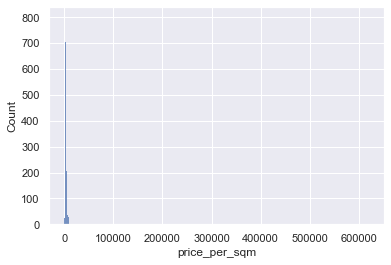

In [23]:
sns.set(style="darkgrid")
sns.histplot(data=dtA, x="price_per_sqm")
plt.show()

In [38]:
### Lets look at this value
dtA[dtA['price_per_sqm'] >= 600000]

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,no_of_bathrooms,energy_class,renovation_year,no_of_wc,ad_type,living_rooms,kitchens,balcony_area,lux_home,new_development,garage,furnished,preserved,investment,unfinished,heating_under_floor,renovated,requires_renovation,airy,bright,painted,garden,ac,storage,balcony,internal_stairs,view,secure_door,penthouse,alarm,corner,accessible_for_disabled,holiday_home,student_home,night_power,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom,price_per_sqm
10700,35421691,147.9,5976.0,south beach,1,620000,2008,1,maisonette,3,2,NaN,NaN,1,simple,1,1,30,True,True,True,False,False,True,False,False,False,False,True,True,True,True,False,True,True,True,False,True,False,False,False,NaN,False,False,False,False,True,False,True,False,True,False,False,False,False,620000.0


In [ ]:
###Obviously it cannot be 1 sqm! It is an erroneous entry so we will exclude it

In [26]:
###Let us take off sample this value 

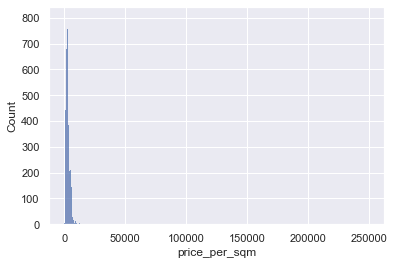

In [47]:
dtA_1=dtA[dtA['price_per_sqm'] <= 600000].copy()
# and rerun a histogram
sns.histplot(data=dtA_1, x="price_per_sqm")
plt.show()

In [43]:
###Lets review more extreme values just to ckeck the possibility of error. Let us review price per sqm above 20000

In [46]:
dtA[dtA['price_per_sqm'] >= 20000]

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,no_of_bathrooms,energy_class,renovation_year,no_of_wc,ad_type,living_rooms,kitchens,balcony_area,lux_home,new_development,garage,furnished,preserved,investment,unfinished,heating_under_floor,renovated,requires_renovation,airy,bright,painted,garden,ac,storage,balcony,internal_stairs,view,secure_door,penthouse,alarm,corner,accessible_for_disabled,holiday_home,student_home,night_power,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom,price_per_sqm
7425,42344599,134.9,12423.0,northern sub,1100,25000000,1920,ground-floor,detached,20,6,NaN,NaN,0,simple,0,4,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,True,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,22727.272727
10700,35421691,147.9,5976.0,south beach,1,620000,2008,1,maisonette,3,2,NaN,NaN,1,simple,1,1,30,True,True,True,False,False,True,False,False,False,False,True,True,True,True,False,True,True,True,False,True,False,False,False,NaN,False,False,False,False,True,False,True,False,True,False,False,False,False,620000.000000
11779,41449891,63.7,9619.0,northern sub,327,8000000,1910,ground-floor,detached,4,0,NaN,NaN,0,simple,0,0,0,NaN,False,False,False,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,NaN,False,False,NaN,False,False,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,NaN,24464.831804
12721,43078274,45.5,NaN,beesy neighborhood,10,2500000,0,ground-floor,houseboat,0,0,NaN,NaN,0,simple,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.000000


In [40]:
### A 10 sqm subtype houseboat probably will not be an error. 
### So only the entry of 1sqm 620000 is clearly an error and we move on without that. 

In [ ]:
### 

In [41]:
### Before getting to what exactly marketing asks for, 

In [42]:
### Let us see the total view for prices per sqm below 100000 euros per sqm

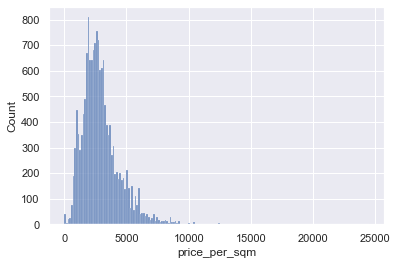

In [49]:
dtA_2=dtA_1[dtA_1['price_per_sqm'] <= 100000].copy()
# and rerun a histogram
sns.histplot(data=dtA_2, x="price_per_sqm")
plt.show()

In [37]:
### Let us see the basic statistics for the total data (without the erroneous entry)

In [51]:
dtA_1['price_per_sqm'].describe()

count     15446.000000
mean       2939.899297
std        2526.109131
min           0.000000
25%        1911.764706
50%        2649.006623
75%        3586.769115
max      250000.000000
Name: price_per_sqm, dtype: float64

In [54]:
#We have values of zero or very low in price per sqm. Let us check that too.
dtA_1[dtA_1['price_per_sqm']<100]

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,no_of_bathrooms,energy_class,renovation_year,no_of_wc,ad_type,living_rooms,kitchens,balcony_area,lux_home,new_development,garage,furnished,preserved,investment,unfinished,heating_under_floor,renovated,requires_renovation,airy,bright,painted,garden,ac,storage,balcony,internal_stairs,view,secure_door,penthouse,alarm,corner,accessible_for_disabled,holiday_home,student_home,night_power,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom,price_per_sqm
551,43447318,58.6,18491.0,northern sub,270,450,0,NaN,detached,3,0,NaN,NaN,0,simple,0,0,0,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667
2162,43208250,125.2,13328.0,south beach,277,1,2019,4,apartment,4,4,aplus,NaN,1,simple,1,1,0,False,False,True,False,False,False,False,True,False,False,False,True,False,True,True,True,True,False,True,True,False,True,False,NaN,False,False,False,False,False,False,True,False,False,False,False,True,False,0.003610
2220,43028226,122.5,13328.0,south beach,229,1,2019,4,apartment,3,3,aplus,NaN,1,simple,1,1,0,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,True,True,False,True,True,False,True,False,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,0.004367
2221,43028230,119.5,13328.0,south beach,231,1,2019,4,apartment,3,3,aplus,NaN,1,simple,1,1,0,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,True,True,False,True,True,False,True,False,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,0.004329
2222,43028231,122.0,13328.0,south beach,150,1,2019,2,apartment,3,3,aplus,NaN,1,simple,1,1,0,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,True,True,False,False,True,False,True,False,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,0.006667
2223,43028235,129.0,13328.0,south beach,148,1,2019,3,apartment,3,3,aplus,NaN,1,simple,1,1,0,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,True,True,False,False,True,False,True,False,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,0.006757
2224,43028243,122.0,13328.0,south beach,148,1,2019,2,apartment,3,3,aplus,NaN,1,simple,1,1,0,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,True,True,False,False,True,False,True,False,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,0.006757
2225,43028244,128.0,13328.0,south beach,150,1,2019,2,apartment,3,3,aplus,NaN,1,simple,1,1,0,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,True,True,False,False,True,False,True,False,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,0.006667
2226,43028247,129.0,13328.0,south beach,135,1,2019,1,apartment,3,3,aplus,NaN,1,simple,1,1,0,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,True,True,False,False,True,False,True,False,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,0.007407
2227,43028252,129.0,13328.0,south beach,136,1,2019,1,apartment,3,3,aplus,NaN,1,simple,1,1,0,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,True,True,False,False,True,False,True,False,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,0.007353


In [55]:
### Obviously prices for homes of 1 euro or too low or a 1400000 sqm property are erroneous. 
###Let us make a decision to move faster instead of diving into evry detail
### We will,further to the exclusion of the erroneous high price, exclude properties below 10000 euro price and 100 euros per sqm
### and also price per sqm > 100000. Maybe excluding below higher than 100 euros per sqm say 300 might have been even better

In [62]:
dtA_3=dtA_2[(dtA_2['price']>= 8000) & (dtA_2['price_per_sqm']>= 100)]

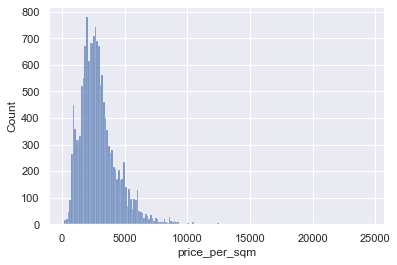

In [63]:
sns.histplot(data=dtA_3, x="price_per_sqm")
plt.show()

In [65]:
dtA_3["price_per_sqm"].describe()

count    15404.000000
mean      2931.683990
std       1553.313692
min        195.876289
25%       1923.076923
50%       2656.250000
75%       3595.505618
max      24464.831804
Name: price_per_sqm, dtype: float64

### Let us use the dtA_3 data set to show histograms and calculate statistics per subtype and per geography

In [66]:
### Obviously the screening of prices and home areas could have been more thorough, but for the sake of speed in this assignment
### let us proceed with that

#### Price per sqm per house type (subtype) irrespective of area

Subtype is apartment


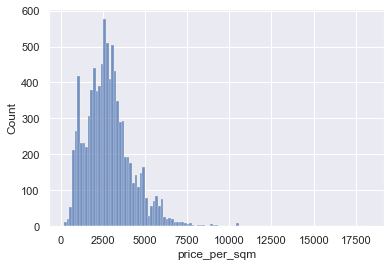

count     9282.000000
mean      2863.416898
std       1405.776009
min        222.222222
25%       1909.090909
50%       2700.000000
75%       3542.701435
max      18260.869565
Name: price_per_sqm, dtype: float64

Next house type
Subtype is detached


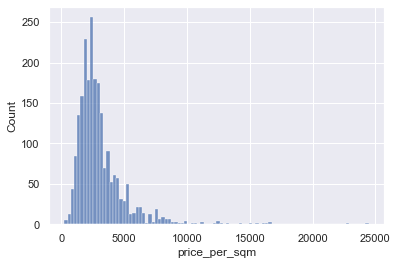

count     2223.000000
mean      3078.117643
std       1983.088312
min        250.000000
25%       1914.070506
50%       2575.757576
75%       3600.000000
max      24464.831804
Name: price_per_sqm, dtype: float64

Next house type
Subtype is maisonette


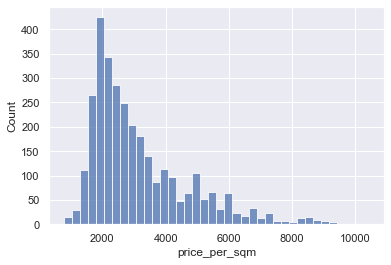

count     3153.000000
mean      3167.767896
std       1555.309481
min        800.000000
25%       2037.037037
50%       2680.000000
75%       3925.925926
max      10416.666667
Name: price_per_sqm, dtype: float64

Next house type
Subtype is building


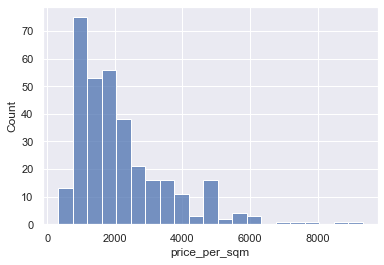

count     332.000000
mean     2188.132175
std      1453.491727
min       317.460317
25%      1125.000000
50%      1762.856086
75%      2662.203416
max      9333.333333
Name: price_per_sqm, dtype: float64

Next house type
Subtype is villa


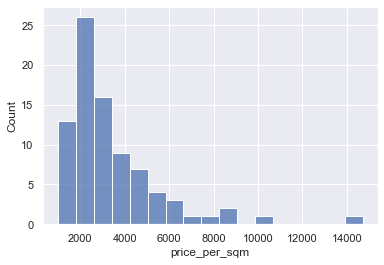

count       84.000000
mean      3399.253358
std       2218.054593
min       1000.000000
25%       2051.724138
50%       2691.761364
75%       3892.857143
max      14705.882353
Name: price_per_sqm, dtype: float64

Next house type
Subtype is other residential


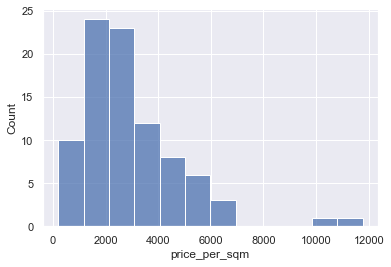

count       88.000000
mean      2941.086786
std       1927.253774
min        195.876289
25%       1593.608597
50%       2471.678187
75%       3794.642857
max      11764.705882
Name: price_per_sqm, dtype: float64

Next house type
Subtype is studio


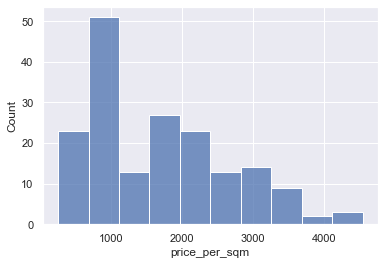

count     178.000000
mean     1695.440238
std       960.382112
min       257.575758
25%      1000.000000
50%      1604.928458
75%      2323.018293
max      4545.454545
Name: price_per_sqm, dtype: float64

Next house type
Subtype is apartment complex


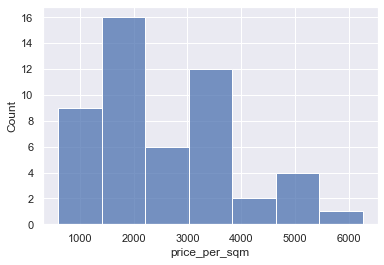

count      50.000000
mean     2521.777725
std      1310.951875
min       600.000000
25%      1561.688312
50%      2195.345114
75%      3215.622072
max      6250.000000
Name: price_per_sqm, dtype: float64

Next house type
Subtype is loft


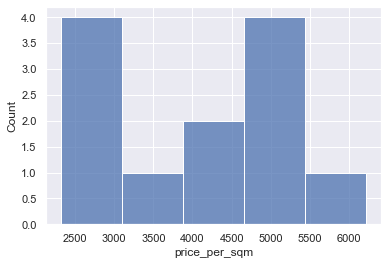

count      12.000000
mean     3972.787640
std      1302.819033
min      2325.581395
25%      2500.000000
50%      4279.853480
75%      4907.419355
max      6211.180124
Name: price_per_sqm, dtype: float64

Next house type
Subtype is bungalow


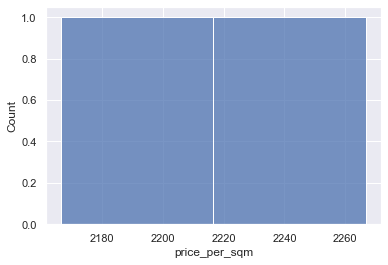

count       2.000000
mean     2216.666667
std        70.710678
min      2166.666667
25%      2191.666667
50%      2216.666667
75%      2241.666667
max      2266.666667
Name: price_per_sqm, dtype: float64

Next house type


In [83]:
for i in dtA_3['subtype'].unique():
    print('Subtype is'+' '+i)
    X=dtA_3[dtA_3['subtype']==i]
    sns.histplot(data=X, x="price_per_sqm")
    plt.show()
    print(X['price_per_sqm'].describe())
    print("")
    print('Next house type')

In [84]:
### We can see means, stds and quantiles above per subtype. Ofcourse we could input them in table but for this it is enough.

#### Price per sqm per geography irrespective of subtype

Geography is northern sub


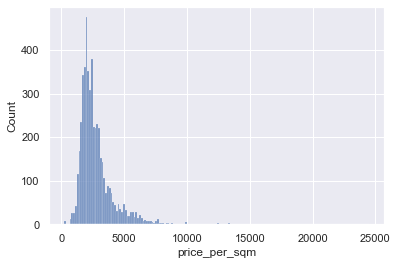

count     5082.000000
mean      2763.205141
std       1421.055989
min        250.000000
25%       1923.076923
50%       2400.000000
75%       3142.857143
max      24464.831804
Name: price_per_sqm, dtype: float64

Next geographical area
Geography is south beach


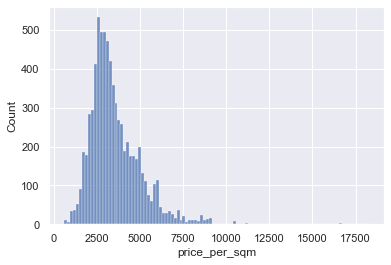

count     7301.000000
mean      3574.888251
std       1501.994179
min        625.000000
25%       2611.940299
50%       3214.285714
75%       4285.714286
max      18260.869565
Name: price_per_sqm, dtype: float64

Next geographical area
Geography is gentrification area


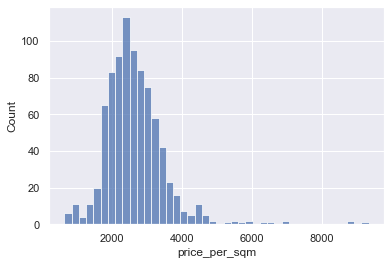

count     841.000000
mean     2635.266451
std       886.524988
min       625.000000
25%      2083.333333
50%      2500.000000
75%      3076.923077
max      9333.333333
Name: price_per_sqm, dtype: float64

Next geographical area
Geography is beesy neighborhood


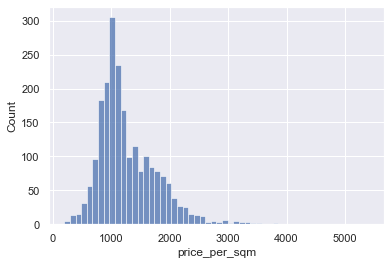

count    2180.000000
mean     1284.648369
std       534.385446
min       195.876289
25%       940.000000
50%      1133.333333
75%      1571.428571
max      5405.405405
Name: price_per_sqm, dtype: float64

Next geographical area


In [92]:
for geo in dtA_3['geography_name'].unique():
    print('Geography is'+' '+geo)
    Y=dtA_3[dtA_3['geography_name']==geo]
    sns.histplot(data=Y, x="price_per_sqm")
    plt.show()
    print(Y['price_per_sqm'].describe())
    print("")
    print('Next geographical area')

#### Let us combine subtype and geography

Geography is northern sub
Subtype is apartment


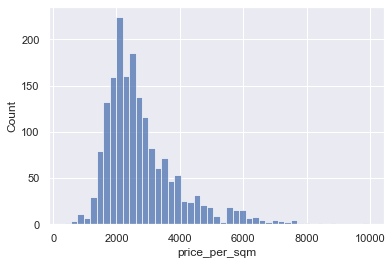

count    1787.000000
mean     2794.417461
std      1206.097623
min       352.733686
25%      2000.000000
50%      2500.000000
75%      3260.869565
max      9960.159363
Name: price_per_sqm, dtype: float64

Next house type
Subtype is detached


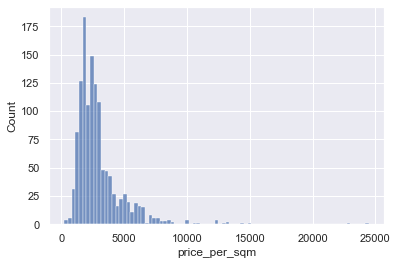

count     1280.000000
mean      2991.231349
std       1962.678288
min        250.000000
25%       1833.333333
50%       2500.000000
75%       3417.200855
max      24464.831804
Name: price_per_sqm, dtype: float64

Next house type
Subtype is maisonette


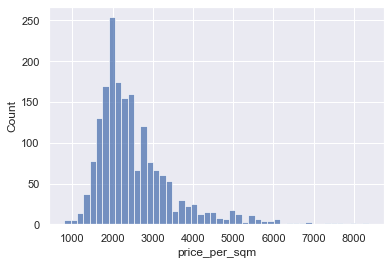

count    1857.000000
mean     2546.057570
std       992.209159
min       800.000000
25%      1923.076923
50%      2260.869565
75%      2906.976744
max      8368.200837
Name: price_per_sqm, dtype: float64

Next house type
Subtype is building


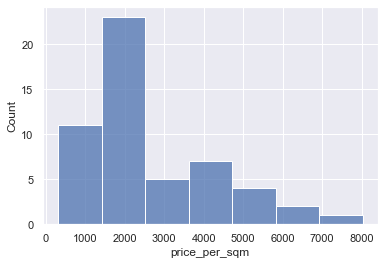

count      53.000000
mean     2684.914352
std      1632.216286
min       317.460317
25%      1500.000000
50%      2166.666667
75%      3666.666667
max      8021.390374
Name: price_per_sqm, dtype: float64

Next house type
Subtype is villa


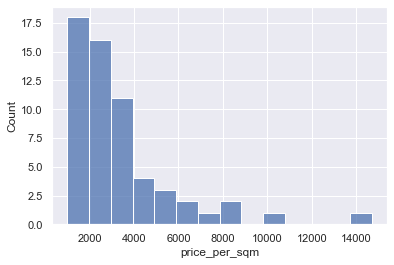

count       59.000000
mean      3356.887268
std       2518.126691
min       1000.000000
25%       1848.870056
50%       2517.985612
75%       3803.571429
max      14705.882353
Name: price_per_sqm, dtype: float64

Next house type
Subtype is other residential


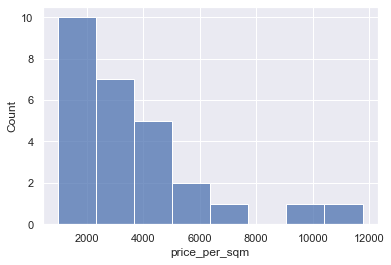

count       27.000000
mean      3584.023400
std       2541.382552
min        994.575045
25%       1950.000000
50%       2750.000000
75%       4041.125541
max      11764.705882
Name: price_per_sqm, dtype: float64

Next house type
Subtype is studio


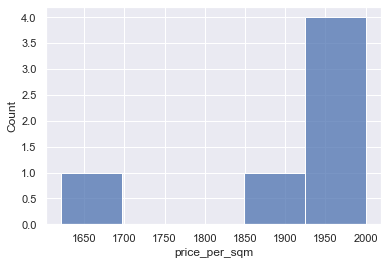

count       6.000000
mean     1921.063921
std       151.561911
min      1621.621622
25%      1928.571429
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: price_per_sqm, dtype: float64

Next house type
Subtype is apartment complex


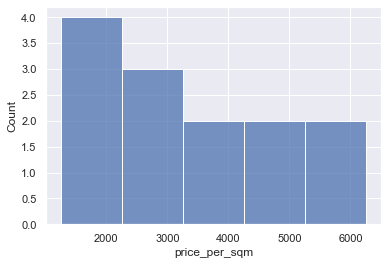

count      13.000000
mean     3348.282011
std      1588.163472
min      1263.157895
25%      1935.483871
50%      3115.264798
75%      4693.396226
max      6250.000000
Name: price_per_sqm, dtype: float64

Next house type
Geographical area type is
Geography is south beach
Subtype is apartment


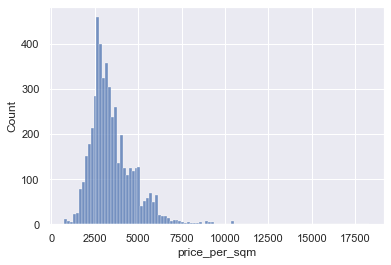

count     4969.000000
mean      3500.471626
std       1287.656988
min        755.319149
25%       2659.574468
50%       3200.000000
75%       4102.564103
max      18260.869565
Name: price_per_sqm, dtype: float64

Next house type
Subtype is detached


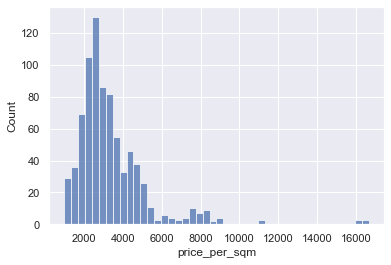

count      811.000000
mean      3411.389075
std       2029.991200
min        966.666667
25%       2307.692308
50%       2875.000000
75%       3975.391331
max      16666.666667
Name: price_per_sqm, dtype: float64

Next house type
Subtype is maisonette


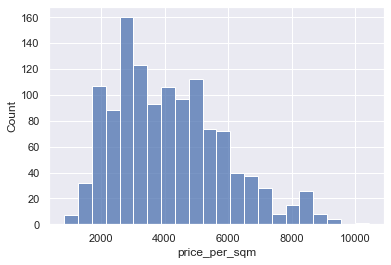

count     1238.000000
mean      4150.608817
std       1747.586173
min        850.000000
25%       2772.757697
50%       3925.925926
75%       5217.391304
max      10416.666667
Name: price_per_sqm, dtype: float64

Next house type
Subtype is building


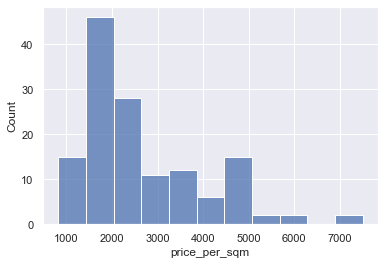

count     139.000000
mean     2657.654096
std      1352.285282
min       818.181818
25%      1670.833333
50%      2166.666667
75%      3333.333333
max      7500.000000
Name: price_per_sqm, dtype: float64

Next house type
Subtype is studio


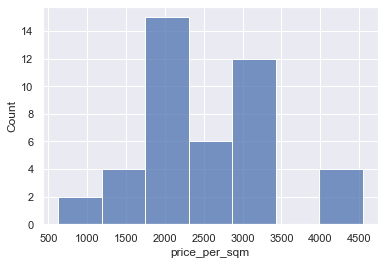

count      43.000000
mean     2496.024365
std       891.287299
min       625.000000
25%      1850.000000
50%      2317.073171
75%      3062.500000
max      4545.454545
Name: price_per_sqm, dtype: float64

Next house type
Subtype is villa


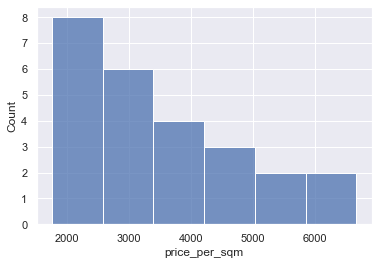

count      25.000000
mean     3499.237331
std      1294.362401
min      1764.705882
25%      2444.444444
50%      3076.923077
75%      4444.444444
max      6666.666667
Name: price_per_sqm, dtype: float64

Next house type
Subtype is other residential


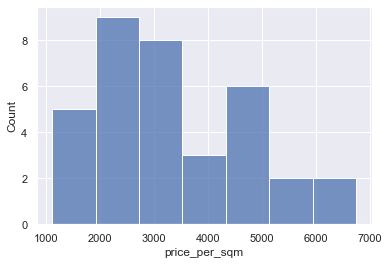

count      35.000000
mean     3411.401919
std      1462.165004
min      1111.111111
25%      2419.474586
50%      3086.419753
75%      4618.421053
max      6746.031746
Name: price_per_sqm, dtype: float64

Next house type
Subtype is apartment complex


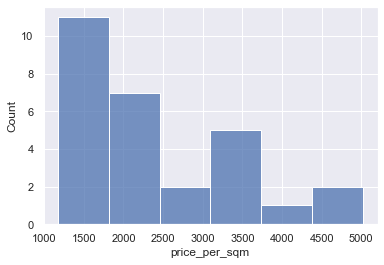

count      28.000000
mean     2429.696419
std      1050.040667
min      1176.470588
25%      1597.727273
50%      2195.345114
75%      3176.760563
max      5016.722408
Name: price_per_sqm, dtype: float64

Next house type
Subtype is loft


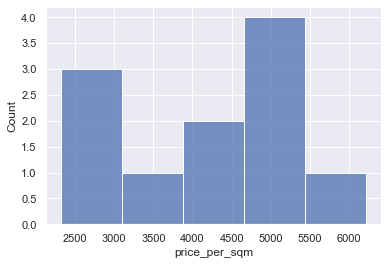

count      11.000000
mean     4112.504931
std      1268.619334
min      2325.581395
25%      2957.317073
50%      4457.142857
75%      4911.612903
max      6211.180124
Name: price_per_sqm, dtype: float64

Next house type
Subtype is bungalow


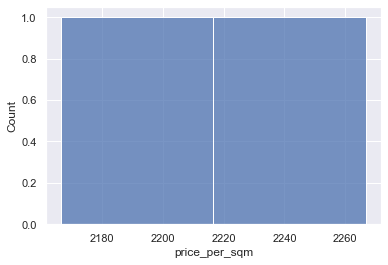

count       2.000000
mean     2216.666667
std        70.710678
min      2166.666667
25%      2191.666667
50%      2216.666667
75%      2241.666667
max      2266.666667
Name: price_per_sqm, dtype: float64

Next house type
Geographical area type is
Geography is gentrification area
Subtype is apartment


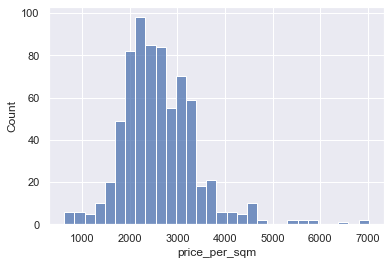

count     706.000000
mean     2623.949468
std       794.404924
min       625.000000
25%      2112.179487
50%      2506.097561
75%      3076.923077
max      7017.543860
Name: price_per_sqm, dtype: float64

Next house type
Subtype is building


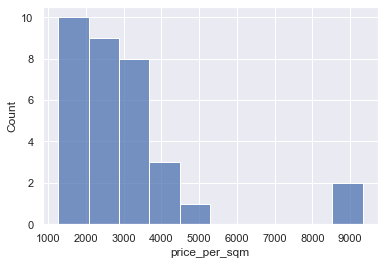

count      33.000000
mean     2957.165909
std      1748.867995
min      1260.869565
25%      1845.637584
50%      2411.764706
75%      3220.338983
max      9333.333333
Name: price_per_sqm, dtype: float64

Next house type
Subtype is detached


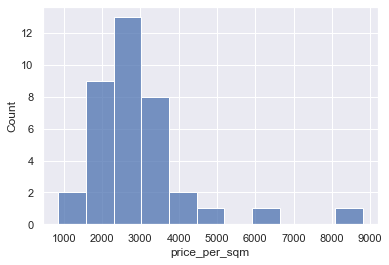

count      37.000000
mean     2956.280902
std      1418.791864
min       857.142857
25%      2142.857143
50%      2713.178295
75%      3389.830508
max      8800.000000
Name: price_per_sqm, dtype: float64

Next house type
Subtype is studio


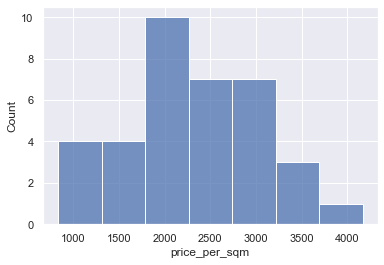

count      36.000000
mean     2269.693601
std       797.151093
min       833.333333
25%      1825.000000
50%      2265.625000
75%      2875.000000
max      4166.666667
Name: price_per_sqm, dtype: float64

Next house type
Subtype is maisonette


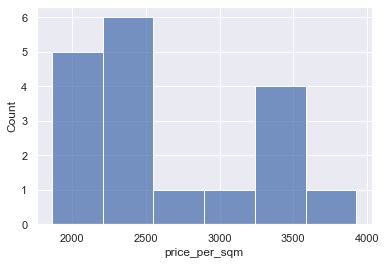

count      18.000000
mean     2620.773702
std       653.929974
min      1863.636364
25%      2093.112245
50%      2285.714286
75%      3225.000000
max      3928.571429
Name: price_per_sqm, dtype: float64

Next house type
Subtype is other residential


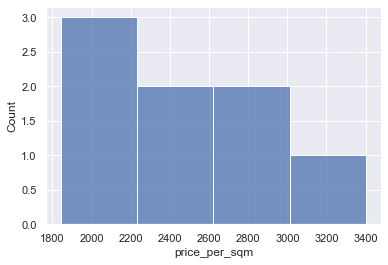

count       8.000000
mean     2376.745530
std       535.766572
min      1845.637584
25%      1907.837967
50%      2313.725490
75%      2675.000000
max      3400.000000
Name: price_per_sqm, dtype: float64

Next house type
Subtype is loft


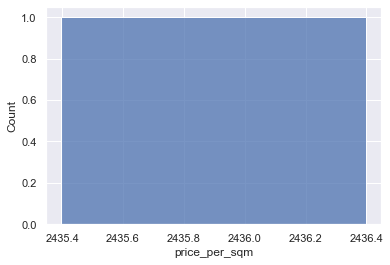

count       1.000000
mean     2435.897436
std              NaN
min      2435.897436
25%      2435.897436
50%      2435.897436
75%      2435.897436
max      2435.897436
Name: price_per_sqm, dtype: float64

Next house type
Subtype is apartment complex


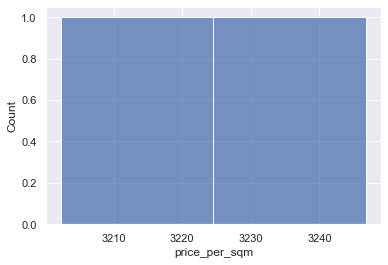

count       2.000000
mean     3224.567100
std        31.375950
min      3202.380952
25%      3213.474026
50%      3224.567100
75%      3235.660173
max      3246.753247
Name: price_per_sqm, dtype: float64

Next house type
Geographical area type is
Geography is beesy neighborhood
Subtype is apartment


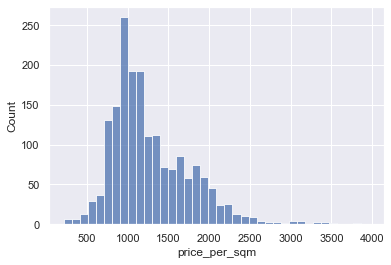

count    1820.000000
mean     1284.758136
std       502.674334
min       222.222222
25%       957.746479
50%      1142.160279
75%      1573.308271
max      3958.333333
Name: price_per_sqm, dtype: float64

Next house type
Subtype is detached


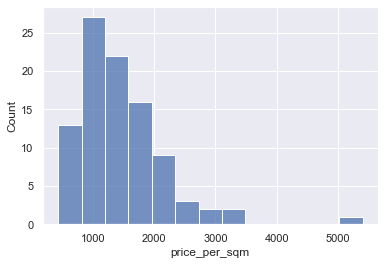

count      95.000000
mean     1451.162751
std       724.646463
min       428.571429
25%       945.454545
50%      1259.842520
75%      1854.166667
max      5405.405405
Name: price_per_sqm, dtype: float64

Next house type
Subtype is building


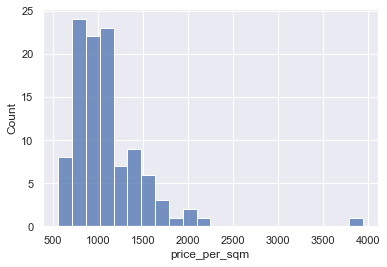

count     107.000000
mean     1094.944177
std       427.887482
min       555.555556
25%       827.777778
50%      1000.000000
75%      1209.508882
max      3941.810345
Name: price_per_sqm, dtype: float64

Next house type
Subtype is maisonette


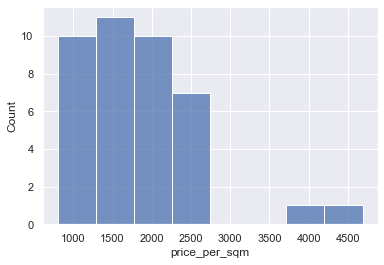

count      40.000000
mean     1857.890701
std       794.970964
min       806.451613
25%      1297.901460
50%      1666.666667
75%      2229.824561
max      4687.500000
Name: price_per_sqm, dtype: float64

Next house type
Subtype is studio


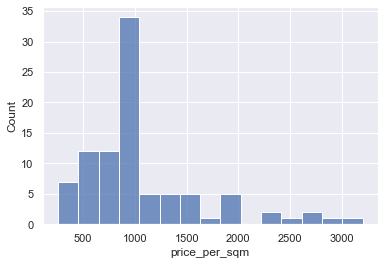

count      93.000000
mean     1088.429694
std       603.691350
min       257.575758
25%       703.703704
50%      1000.000000
75%      1176.470588
max      3200.000000
Name: price_per_sqm, dtype: float64

Next house type
Subtype is apartment complex


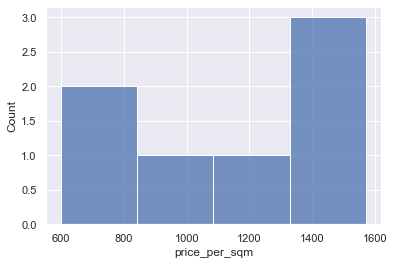

count       7.000000
mean     1154.369453
std       403.918599
min       600.000000
25%       838.537470
50%      1183.574879
75%      1524.253892
max      1571.428571
Name: price_per_sqm, dtype: float64

Next house type
Subtype is other residential


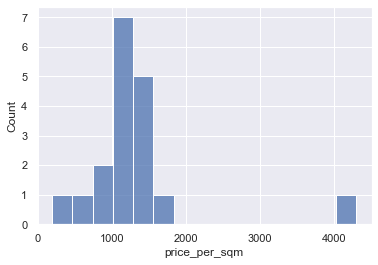

count      18.000000
mean     1312.998551
std       817.417539
min       195.876289
25%      1049.365942
50%      1206.355877
75%      1421.428571
max      4302.325581
Name: price_per_sqm, dtype: float64

Next house type
Geographical area type is


In [94]:
for geo in dtA_3['geography_name'].unique():
    print('Geography is'+' '+geo)
    dtA_4=dtA_3[dtA_3['geography_name']==geo].copy()
    for i in dtA_4['subtype'].unique():
        print('Subtype is'+' '+i)
        X=dtA_4[dtA_4['subtype']==i]
        sns.histplot(data=X, x="price_per_sqm")
        plt.show()
        print(X['price_per_sqm'].describe())
        print("")
        print('Next house type')
    print('Geographical area type is')     

In [95]:
### No need to go into such complexity. Just show it is possible. We could just collect and show extra means per geography and means per type in two bar graphs
### for the two distinctions in area and type separately.

## Assignment Part 2

In [96]:
### Out basic data frame continues to be dtA_3

In [133]:
dtA_3B=dtA_3[['geography_name', 'ad_type', 'ranking_score']]

In [134]:
dtA_3B.describe()
dtA_3B.head()

,geography_name,ad_type,ranking_score
0,northern sub,simple,47.0
1,northern sub,simple,134.7
2,northern sub,simple,71.0
3,northern sub,simple,122.0
4,northern sub,simple,126.7


In [110]:
### For the case of this assignment and for speed we will not address at the moment that the same property might appear more than once in our data set through multiple agents

In [ ]:
### If I have understood well the rank in the index per area is decided by the ad_type (chosen I guess by those placing the ad, ie agents, paid and decided by property owners(?) if i am right and ranking_score (decided by visitors in the online platforms my best guess)
### A highly competitive area is considered one "that it would be hard for a simple listing to rank high in the 
### search results of this area just by having a high ranking score". 

In [135]:
### We will use data sets by area
dtA_3B['geography_name'].unique()

array(['northern sub', 'south beach', 'gentrification area',
       'beesy neighborhood'], dtype=object)

In [202]:

dtnorth=dtA_3B[dtA_3B['geography_name']=='northern sub'].copy()
dtsouth=dtA_3B[dtA_3B['geography_name']=='south beach'].copy()
dtgentr=dtA_3B[dtA_3B['geography_name']=='gentrification area'].copy()
dtbeesy=dtA_3B[dtA_3B['geography_name']=='beesy neighborhood'].copy()

In [194]:
dtA_3B['ad_type'].unique()

array(['simple', 'up', 'star', 'premium'], dtype=object)

In [203]:
dtnorth['rindex']=(dtnorth.index+1)*(-1)

In [204]:
dtsouth['rindex']=(dtsouth.index+1)*(-1)
dtgentr['rindex']=(dtgentr.index+1)*(-1)                   
dtbeesy['rindex']=(dtbeesy.index+1)*(-1)

In [ ]:
###Let us rank rindex per area in deciles. We could have moced differently and use the existing index of observations, but deciles will probably show what is going on

In [205]:
dtnorth['decile_index'] = pd.qcut(dtnorth['rindex'], 10, labels = False)
dtsouth['decile_index'] = pd.qcut(dtsouth['rindex'], 10, labels = False)
dtgentr['decile_index'] = pd.qcut(dtgentr['rindex'], 10, labels = False)
dtbeesy['decile_index'] = pd.qcut(dtbeesy['rindex'], 10, labels = False)

In [228]:
dtnorth['decile_index'].value_counts()

9    509
0    509
8    508
7    508
6    508
5    508
4    508
3    508
2    508
1    508
Name: decile_index, dtype: int64

In [229]:
dtsouth['decile_index'].value_counts()

0    731
9    730
8    730
7    730
6    730
5    730
4    730
3    730
2    730
1    730
Name: decile_index, dtype: int64

In [230]:
dtgentr['decile_index'].value_counts()

0    85
9    84
8    84
7    84
6    84
5    84
4    84
3    84
2    84
1    84
Name: decile_index, dtype: int64

In [231]:
dtbeesy['decile_index'].value_counts()

9    218
8    218
7    218
6    218
5    218
4    218
3    218
2    218
1    218
0    218
Name: decile_index, dtype: int64

In [ ]:
### We created per geographic area different tables, inputing the index of appearence (negative) in deciles so the more high in the list
### the higher in the negative of the index it is in higher quantile. Now we can compare average of ad type simple
### for every area

In [232]:
# Northern suburbs

In [243]:
dtnorth.groupby('ad_type')['ranking_score'].mean()

ad_type
premium    135.114634
simple     117.664867
star       123.132609
up         114.109259
Name: ranking_score, dtype: float64

In [244]:
dtnorth.groupby('ad_type')['decile_index'].mean()

ad_type
premium    4.765854
simple     4.461259
star       5.123188
up         5.259259
Name: decile_index, dtype: float64

In [ ]:
### We could use as first quick index of competitiveness the ratio for simple ad types
### of average decile_index over average ranking_score lets say times 100 to make it clearer.

In [ ]:
###For north this is

In [253]:
N_score=4.4612/117.66*100
N_score

3.7916029236783952

In [242]:
# Southern 

,geography_name,ad_type,ranking_score,rindex,decile_index
0,northern sub,simple,47.0,-1,9
1,northern sub,simple,134.7,-2,9
2,northern sub,simple,71.0,-3,9
3,northern sub,simple,122.0,-4,9
4,northern sub,simple,126.7,-5,9


In [245]:
dtsouth.groupby('ad_type')['ranking_score'].mean()

ad_type
premium    126.478261
simple     118.579149
star       122.596842
up         109.491935
Name: ranking_score, dtype: float64

In [246]:
dtsouth.groupby('ad_type')['decile_index'].mean()

ad_type
premium    3.987578
simple     4.518688
star       4.031579
up         4.370968
Name: decile_index, dtype: float64

In [248]:
### The index for south is 

In [254]:
S_score=4.5186/118.579*100
S_score

3.810624140868114

In [252]:
### The South is more competitive than the North for a start

In [255]:
#For gentrification area

In [258]:
dtgentr.groupby('ad_type')['ranking_score'].mean()


ad_type
premium    134.300000
simple     117.370505
star       133.982353
up         137.593333
Name: ranking_score, dtype: float64

In [257]:
dtgentr.groupby('ad_type')['decile_index'].mean()

ad_type
premium    4.583333
simple     4.463131
star       5.176471
up         5.133333
Name: decile_index, dtype: float64

In [259]:
G_score=4.463/117.3705*100
G_score

3.8024887003122587

In [ ]:
#For beesy area

In [260]:
dtbeesy.groupby('ad_type')['ranking_score'].mean()

ad_type
premium    116.438636
simple     111.425145
star       118.176667
up         115.235294
Name: ranking_score, dtype: float64

In [262]:
dtbeesy.groupby('ad_type')['decile_index'].mean()

ad_type
premium    5.090909
simple     4.487452
star       4.900000
up         4.147059
Name: decile_index, dtype: float64

In [263]:
B_score=4.48745/111.4251*100
B_score

4.027324184586776

In [ ]:
### It appears (unless I have been erroneous in my quick implementation, needs to see again) the highest score (more competitive is for busy), that is average higher quantile of ranking divided by ranking score

In [264]:
### We could normalize the four scores with maxmin among themselves cause as such they carry less meaning

In [265]:
scores=[N_score, S_score, G_score, B_score}

In [278]:
scoresnorm1={'north':N_score, 'south':S_score, 'gentr':G_score, 'beesy':B_score}
for i,j in scoresnorm1.items(): 
    scoresnorm1[i]=((j-min(scores))/(max(scores)/min(scores)))

In [280]:
scoresnorm1

{'north': 0.0,
 'south': 0.0179078960130593,
 'gentr': 0.01024862678535567,
 'beesy': 0.22192437982865776}

In [279]:
### Competitiveness rank appears so for arreas from leest north < gentr < south < beesy most competitive

{'north': 0.0,
 'south': 0.0179078960130593,
 'gentr': 0.01024862678535567,
 'beesy': 0.22192437982865776}

In [ ]:
### I am not gonna verify again the correctness of the above, I implemented a quick idea on the fly
### More analysis and closer look could reveal more (the above relies too much on average), but let us try to see issue another way too

In [281]:
### We could also run a regression of decile ranking on the ranking scores and ad_types per area to see whar results we get
### especially wrt significance of ranking scores (less would mean more competitiveness)
### we could have used deciles also in ranking scores but anyway

In [282]:
#North

In [285]:
mod_N = smf.ols(formula='decile_index ~ ranking_score + C(ad_type)', data=dtnorth)
resN = mod_N.fit()

In [288]:
print(resN.summary())

                            OLS Regression Results                            
Dep. Variable:           decile_index   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     36.08
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           8.94e-30
Time:                        19:54:33   Log-Likelihood:                -12503.
No. Observations:                5082   AIC:                         2.502e+04
Df Residuals:                    5077   BIC:                         2.505e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.7068 

In [ ]:
### Very week model (almost nothing Rsq) and totally unsignificant (p value 0.85!) simple parameter
### Ranking score significant (0 p value). So ranking score plays role here! Less competitive. It was our least competitive earlier.

In [ ]:
#South

In [289]:
mod_S = smf.ols(formula='decile_index ~ ranking_score + C(ad_type)', data=dtsouth)
resS = mod_S.fit()

In [290]:
print(resS.summary())

                            OLS Regression Results                            
Dep. Variable:           decile_index   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     27.98
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           4.30e-23
Time:                        19:58:06   Log-Likelihood:                -18008.
No. Observations:                7301   AIC:                         3.603e+04
Df Residuals:                    7296   BIC:                         3.606e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.3490 

In [ ]:
#The parameter for south in simple appears in essence significant (0.05)! So probably not 0. 
###Ranking score as previously is significant. Plays a role too.But more competitive than previous since simple parameter sort of significant.
### Might signify role of other features lacking from the model for simple.

In [ ]:
#Gentr

In [291]:
mod_G = smf.ols(formula='decile_index ~ ranking_score + C(ad_type)', data=dtgentr)
resG = mod_G.fit()

In [292]:
print(resG.summary())

                            OLS Regression Results                            
Dep. Variable:           decile_index   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     5.697
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           0.000159
Time:                        20:05:35   Log-Likelihood:                -2070.1
No. Observations:                 841   AIC:                             4150.
Df Residuals:                     836   BIC:                             4174.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.6258 

In [293]:
### simple parameter (p value 0.795) totally insignificant as in North but with lower p value. So the ranking we saw earlier South>Gentr>North in competitiveness appears to hold.
###Let us see the last

In [294]:
#Beesy

In [295]:
mod_B = smf.ols(formula='decile_index ~ ranking_score + C(ad_type)', data=dtbeesy)
resB = mod_B.fit()

In [296]:
print(resB.summary())

                            OLS Regression Results                            
Dep. Variable:           decile_index   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7487
Date:                Thu, 16 Mar 2023   Prob (F-statistic):              0.559
Time:                        20:09:39   Log-Likelihood:                -5391.9
No. Observations:                2180   AIC:                         1.079e+04
Df Residuals:                    2175   BIC:                         1.082e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.0961 

In [ ]:
###Unbelievable, here ranking score is (p_cal 0.981) statistically not significant. And p value of simple low but above 0.05 
### This could imply potentially (ranking score could be thought as zero with higher chance than all) that this
### is most competitive area.
### And so we verify the beesy AS THE MOST COMPETITIVE MARKET OF ALL and the ranking of previous method of the ratio makes sence.
###The North the least. The relative ranking of four regions appears to be so.

In [261]:
### The above analysis is totally for expositional purposes. Probably instead of taking average quantiles and scores we could take averages standardized by their std or some other idea implementation...
###And then renormalize 4 scores among themselves as we did above. Anyway the two approaches followed, seems to agree on results.

## Assignment Part 3

In [104]:
### The first thing that comes to mind after reading question 3. to identify factors of significance influencing 
### the price is a multiple regression to connect as dependend variable the price with as many of the factors (continuous and categorical) we can use.
### Ofc other ML techniques for regression can be also tried or ridge and lasso regr. But a multiple regression would be a place to start.

In [105]:
### Factors' choice and the idea to have the more sparse model which has most explanatory ability, plus the fact that we must clean our data set given NA values in many variables are of interst
### leaves us here with the choice to consider these issues in the most quick and efficient way for the sake of the assignment. 
###Anyway, model creation is a process needing experimenting in time and progress. Let us take a shift look.

In [102]:
dtA_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15404 entries, 0 to 15446
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       15404 non-null  int64  
 1   ranking_score            15404 non-null  float64
 2   agent_id                 15301 non-null  float64
 3   geography_name           15404 non-null  object 
 4   sq_meters                15404 non-null  int64  
 5   price                    15404 non-null  int64  
 6   year_of_construction     15404 non-null  int64  
 7   floor                    14676 non-null  object 
 8   subtype                  15404 non-null  object 
 9   rooms                    15404 non-null  int64  
 10  no_of_bathrooms          15404 non-null  int64  
 11  energy_class             2094 non-null   object 
 12  renovation_year          2065 non-null   float64
 13  no_of_wc                 15404 non-null  int64  
 14  ad_type               

In [106]:
### Having many variables (that are inevitably correlated) might raise issues of multicolinnearily but for prediction this is less worrisome and on the other hand
### having most variables that we can have in the model protects us from the simpsons paradox (variables ommitted influencing both dpendent and factors).

In [108]:
### To start experimenting, let us get basic by removimg factors with very few observations (they could be considered too much later in smaller sample they provide)
### Variables such as accessible_for_disabled,  plus energy class and renovation year can be excluded by start
### Checking correlations is always a good thing in such problems but let us start in a more easy and intuitive way:
### Pick say 15-20 variables we can thing as more potentially more influencial in price, remove NAs and start building a model. Then go for fewer or adjusted variables

In [109]:
### True model building needs much exploration and trials of models. We will take serious shortcuts here. Plus no comparison of linear regression with other algorithms.
### And not even considering technique like cross validation in the test sample.

In [ ]:
### Let us pick the following variables for our 3rd assignment question

In [323]:
dtF=dtA_3[['geography_name', 'sq_meters', 'floor', 'subtype', 'rooms', 'no_of_bathrooms', 'balcony_area', 'lux_home', 'garage', 'view', 'heating_under_floor', 'holiday_home', 'penthouse', 'neoclassic', 'garden', 'double_glass', 'for_commercial_use', 'price']]

In [324]:
dtF.dropna(inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8500\2386503803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtF.dropna(inplace=True)


In [325]:
dtF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8090 entries, 1 to 15446
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   geography_name       8090 non-null   object
 1   sq_meters            8090 non-null   int64 
 2   floor                8090 non-null   object
 3   subtype              8090 non-null   object
 4   rooms                8090 non-null   int64 
 5   no_of_bathrooms      8090 non-null   int64 
 6   balcony_area         8090 non-null   int64 
 7   lux_home             8090 non-null   object
 8   garage               8090 non-null   object
 9   view                 8090 non-null   object
 10  heating_under_floor  8090 non-null   object
 11  holiday_home         8090 non-null   object
 12  penthouse            8090 non-null   object
 13  neoclassic           8090 non-null   object
 14  garden               8090 non-null   object
 15  double_glass         8090 non-null   object
 16  for_c

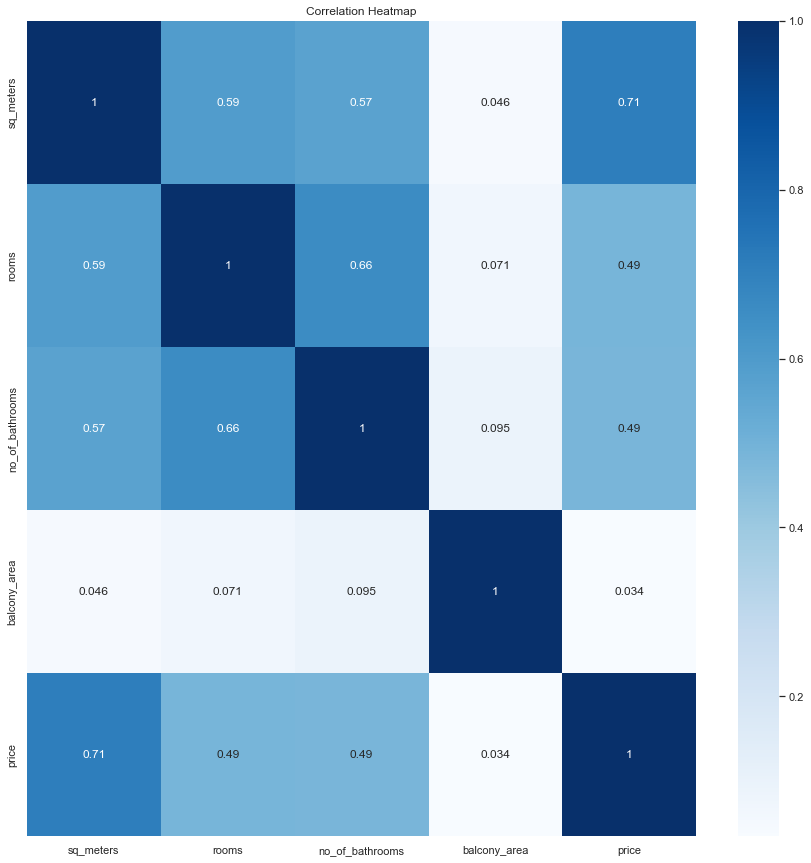

In [326]:
plt.figure(figsize=(15, 15))
plt.title("Correlation Heatmap")
heatmap = sns.heatmap(dtF.corr(), annot=True, cmap="Blues")

In [327]:
X_dt = dtF.drop('price', axis=1)

In [328]:
y = dtF['price']

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y, test_size=0.2, random_state=2, shuffle=True)

In [330]:
X_train['price']=y_train

In [331]:
X_test['price']=y_test

In [332]:
X_train.head()

,geography_name,sq_meters,floor,subtype,rooms,no_of_bathrooms,balcony_area,lux_home,garage,view,heating_under_floor,holiday_home,penthouse,neoclassic,garden,double_glass,for_commercial_use,price
13442,south beach,90,1,apartment,2,1,0,False,True,True,False,False,False,False,False,True,False,300000
11684,northern sub,136,3,apartment,3,2,0,False,True,True,False,False,True,False,False,True,False,350000
1799,south beach,237,3,maisonette,3,3,0,True,True,True,False,False,False,False,True,True,False,1366000
2483,northern sub,260,ground-floor,maisonette,3,2,0,True,True,False,True,False,False,False,True,True,False,700000
10777,south beach,189,1,apartment,3,3,0,False,True,False,False,False,False,False,False,True,False,750000


In [333]:
X_test.head()

,geography_name,sq_meters,floor,subtype,rooms,no_of_bathrooms,balcony_area,lux_home,garage,view,heating_under_floor,holiday_home,penthouse,neoclassic,garden,double_glass,for_commercial_use,price
10725,south beach,900,ground-floor,building,13,1,0,False,True,True,False,False,False,False,False,False,False,4500000
2643,northern sub,250,ground-floor,apartment,3,2,0,True,True,True,False,False,False,False,False,False,False,450000
8051,south beach,115,1,apartment,2,1,1,False,True,True,False,False,False,False,False,True,False,310000
8082,south beach,137,2,apartment,4,2,0,True,True,True,False,False,False,True,False,True,False,385000
5142,northern sub,267,ground-floor,detached,4,3,0,False,True,False,False,False,False,False,False,False,False,680000


In [335]:
X_train.shape

(6472, 18)

In [322]:
X_test.shape

(1611, 18)

In [312]:
### Let us try a model with all above variables

In [336]:
mod3 = smf.ols(formula='price ~ C(geography_name) + sq_meters + C(floor) + C(subtype) + rooms + no_of_bathrooms + balcony_area + C(lux_home) + C(garage) + C(view)  + C(holiday_home) + C(penthouse) + C(neoclassic) + C(garden) + C(double_glass) + C(for_commercial_use)', data=X_train)
res3 = mod3.fit()

In [337]:
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     208.8
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:19:32   Log-Likelihood:                -94014.
No. Observations:                6472   AIC:                         1.881e+05
Df Residuals:                    6435   BIC:                         1.884e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                -2.701e+05   2.33e+04    -11.589      0.000   -3.16e+05   -2.24e+05
C(geography_name)[T.gentrification area]  1.431e+05   2.94e+04      4.873      0.000    8.55e+04    2.01e+05
C(geography_name)[T.northern sub]          8.94e+04   2.62e+04      3.410      0.001     3.8e+04    1.41e+05
C(geography_name)[T.south beach]          2.258e+05   2.27e+04      9.946      0.000    1.81e+05     2.7e+05
C(floor)[T.2]                             6.193e+04   2.09e+04      2.970      0.003    2.11e+04    1.03e+05
C(floor)[T.3]                             8.233e+04   2.19e+04      3.752      0.000    3.93e+04    1.25e+05
C(floor)[T.4]                             1.896e+04   2.61e+04      0.727      0.467   -3.22e+04    7.01e+04
C(floor)[T.5]                              322.0565   4.03e+04      0.008      0.994   -7.86e+04    7.93e+04
C(floor)[T.6]                            -1.307e+04   7.14e+04     -0.183      0.855   -1.53e+05    1.27e+05
C(floor)[T.7]                             5.024e+04    1.3e+05      0.387      0.699   -2.05e+05    3.05e+05
C(floor)[T.8]                             2.459e+05   4.97e+05      0.495      0.621   -7.28e+05    1.22e+06
C(floor)[T.basement]                     -9.977e+04   6.89e+04     -1.447      0.148   -2.35e+05    3.54e+04
C(floor)[T.ground-floor]                 -4806.0485    2.1e+04     -0.229      0.819   -4.59e+04    3.63e+04
C(floor)[T.mezzanine]                     5.899e+04   6.93e+04      0.852      0.394   -7.68e+04    1.95e+05
C(floor)[T.semi-basement]                -2.449e+04   6.49e+04     -0.377      0.706   -1.52e+05    1.03e+05
C(subtype)[T.apartment complex]           3.664e+04   1.38e+05      0.265      0.791   -2.35e+05    3.08e+05
C(subtype)[T.building]                   -3.031e+05   5.44e+04     -5.569      0.000    -4.1e+05   -1.96e+05
C(subtype)[T.bungalow]                    4148.5187   4.95e+05      0.008      0.993   -9.65e+05    9.74e+05
C(subtype)[T.detached]                    5.979e+04   2.66e+04      2.252      0.024    7741.647    1.12e+05
C(subtype)[T.loft]                       -1305.2208   1.87e+05     -0.007      0.994   -3.69e+05    3.66e+05
C(subtype)[T.maisonette]                  2097.8587   1.95e+04      0.107      0.914   -3.62e+04    4.04e+04
C(subtype)[T.other residential]           1.068e+05   9.36e+04      1.141      0.254   -7.67e+04     2.9e+05
C(subtype)[T.studio]                      8.431e+04   5.71e+04      1.476      0.140   -2.77e+04    1.96e+05
C(subtype)[T.villa]                       3.135e+05   9.27e+04      3.383      0.001    1.32e+05    4.95e+05
C(lux_home)[T.True]                       1.199e+05   1.51e+04      7.952      0.000    9.03e+04    1.49e+05
C(garage)[T.True]              

In [ ]:
###Work could happen on categoricals to unite levels not significant and create fewer groups but we will not bother with that here.
### 0.54 sjusted R sq not bad but nothing exciting. And in test sample

In [338]:
### Let us throw away garden, holiday home and introduce also heating under floor. And take log of sq meters and price (sq meters could take any other scaling).
### Jarque berra test rejects normality in residuals easily and there exists excess skewness in sample. Hope log in dependent (price) works better cause we are not gonna
### deal more with that here.

In [339]:
mod4 = smf.ols(formula='np.log(1+price) ~ C(geography_name) + np.log(1+sq_meters)  + C(subtype) + rooms + no_of_bathrooms + balcony_area + C(lux_home) + C(garage) + C(view) + C(penthouse) + C(neoclassic)+C(floor) + C(heating_under_floor) + C(double_glass) + C(for_commercial_use)', data=X_train)
res4 = mod4.fit()

In [340]:
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(1 + price)   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1085.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:30:57   Log-Likelihood:                -2457.5
No. Observations:                6472   AIC:                             4987.
Df Residuals:                    6436   BIC:                             5231.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    7.1080      0.054    132.164      0.000       7.003       7.213
C(geography_name)[T.gentrification area]     0.7343      0.021     34.806      0.000       0.693       0.776
C(geography_name)[T.northern sub]            0.6257      0.019     32.624      0.000       0.588       0.663
C(geography_name)[T.south beach]             0.8718      0.016     53.343      0.000       0.840       0.904
C(subtype)[T.apartment complex]              0.0656      0.098      0.670      0.503      -0.126       0.258
C(subtype)[T.building]                      -0.0175      0.039     -0.448      0.654      -0.094       0.059
C(subtype)[T.bungalow]                      -0.1947      0.355     -0.548      0.584      -0.891       0.502
C(subtype)[T.detached]                       0.1047      0.020      5.288      0.000       0.066       0.143
C(subtype)[T.loft]                           0.0867      0.135      0.644      0.520      -0.177       0.350
C(subtype)[T.maisonette]                     0.0352      0.015      2.424      0.015       0.007       0.064
C(subtype)[T.other residential]              0.1207      0.067      1.793      0.073      -0.011       0.253
C(subtype)[T.studio]                        -0.0642      0.042     -1.527      0.127      -0.147       0.018
C(subtype)[T.villa]                          0.0852      0.066      1.284      0.199      -0.045       0.215
C(lux_home)[T.True]                          0.1565      0.011     14.355      0.000       0.135       0.178
C(garage)[T.True]                            0.1152      0.012      9.296      0.000       0.091       0.139
C(view)[T.True]                             -0.0189      0.010     -1.923      0.054      -0.038       0.000
C(penthouse)[T.True]                         0.0218      0.016      1.380      0.167      -0.009       0.053
C(neoclassic)[T.True]                       -0.0484      0.028     -1.734      0.083      -0.103       0.006
C(floor)[T.2]                                0.0693      0.015      4.637      0.000       0.040       0.099
C(floor)[T.3]                                0.1176      0.016      7.474      0.000       0.087       0.149
C(floor)[T.4]                                0.0840      0.019      4.490      0.000       0.047       0.121
C(floor)[T.5]                                0.1743      0.029      6.027      0.000       0.118       0.231
C(floor)[T.6]                                0.1434      0.051      2.797      0.005       0.043       0.244
C(floor)[T.7]                                0.4867      0.093      5.216      0.000       0.304       0.670
C(floor)[T.8]                                0.9159      0.357      2.567      0.010       0.216       1.615
C(floor)[T.basement]           

In [341]:
#### Now that is an improvement!!! R^2 adjusted at 0.85 that is very good. AIC and BIC much lower. Model fits quite well. Many signoficant parameters for indepentent variables

In [342]:
### JB still rejects normality (how could there be...? anyway) but our skewness and kurtosis of residuals much better (lower)

In [343]:
###We did not do much to improve variable selection just a quick choice and some more thorough work could
### But we are happy with the high R^2 and our goal is forecasting. Adding more variables (correlated to a degree) would add to it something.
### Let us try in test sample. Here is the more crucial.

In [344]:
mod4_out = smf.ols(formula='np.log(1+price) ~ C(geography_name) + np.log(1+sq_meters)  + C(subtype) + rooms + no_of_bathrooms + balcony_area + C(lux_home) + C(garage) + C(view) + C(penthouse) + C(neoclassic)+C(floor) + C(heating_under_floor) + C(double_glass) + C(for_commercial_use)', data=X_test)
res4_out = mod4_out.fit()

In [345]:
res4_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(1 + price)   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     256.9
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:36:16   Log-Likelihood:                -650.62
No. Observations:                1618   AIC:                             1371.
Df Residuals:                    1583   BIC:                             1560.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    7.2814      0.115     63.129      0.000       7.055       7.508
C(geography_name)[T.gentrification area]     0.7602      0.044     17.165      0.000       0.673       0.847
C(geography_name)[T.northern sub]            0.6482      0.039     16.744      0.000       0.572       0.724
C(geography_name)[T.south beach]             0.8805      0.033     26.328      0.000       0.815       0.946
C(subtype)[T.apartment complex]             -0.1612      0.379     -0.426      0.670      -0.904       0.581
C(subtype)[T.building]                       0.0543      0.073      0.748      0.455      -0.088       0.197
C(subtype)[T.detached]                       0.1134      0.041      2.751      0.006       0.033       0.194
C(subtype)[T.loft]                           0.1643      0.369      0.446      0.656      -0.559       0.887
C(subtype)[T.maisonette]                     0.0090      0.031      0.291      0.771      -0.052       0.070
C(subtype)[T.other residential]              0.2081      0.132      1.576      0.115      -0.051       0.467
C(subtype)[T.studio]                        -0.1524      0.093     -1.639      0.101      -0.335       0.030
C(subtype)[T.villa]                         -0.0656      0.139     -0.474      0.636      -0.337       0.206
C(lux_home)[T.True]                          0.1513      0.022      6.764      0.000       0.107       0.195
C(garage)[T.True]                            0.1682      0.026      6.553      0.000       0.118       0.219
C(view)[T.True]                             -0.0400      0.021     -1.938      0.053      -0.081       0.000
C(penthouse)[T.True]                         0.0656      0.034      1.934      0.053      -0.001       0.132
C(neoclassic)[T.True]                       -0.0019      0.052     -0.036      0.971      -0.103       0.100
C(floor)[T.10]                              -0.3713      0.367     -1.011      0.312      -1.092       0.349
C(floor)[T.2]                                0.0323      0.032      1.016      0.310      -0.030       0.095
C(floor)[T.3]                                0.1500      0.033      4.547      0.000       0.085       0.215
C(floor)[T.4]                                0.1085      0.039      2.772      0.006       0.032       0.185
C(floor)[T.5]                                0.1264      0.058      2.172      0.030       0.012       0.240
C(floor)[T.6]                                0.3800      0.135      2.813      0.005       0.115       0.645
C(floor)[T.7]                                0.4644      0.214      2.165      0.031       0.044       0.885
C(floor)[T.basement]                        -0.0601      0.116     -0.520      0.603      -0.287       0.167
C(floor)[T.ground-floor]       

In [356]:
### Result not bad at all! adjusted R^2 remains 0.85. Worked well in the test sample.
### It is just an indication that more thorough work with variable selection could give us an even better model to work
### with new data out of sample. Crossvalidation could help more with other techniques maybe (gboost maybe) or lasso or ridge.
### And maybe if we reduced model with few variables, we would loose some predictive power, but at a good model estimating fewer parameters.
### It would be worth trying also ML algorithms for regression and compared.
### A test data set adj. R^2 of 0.90 and above could be within sight.

### Thank you

### Nikos Papadopoulos